In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [4]:
!pip install pyforest
from pyforest import*

lazy_imports()

['import xgboost as xgb',
 'import pandas as pd',
 'from openpyxl import load_workbook',
 'import seaborn as sns',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import datetime as dt',
 'import altair as alt',
 'import awswrangler as wr',
 'from dask import dataframe as dd',
 'import dash',
 'import numpy as np',
 'import matplotlib as mpl',
 'from pyspark import SparkContext',
 'import statistics',
 'import matplotlib.pyplot as plt',
 'import sys',
 'import plotly.graph_objs as go',
 'import plotly as py',
 'import glob',
 'import sklearn',
 'from sklearn.ensemble import RandomForestRegressor',
 'import spacy',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import re',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import bokeh',
 'from sklearn.preprocessing import OneHotEncoder',
 'import pydot',
 'from sklearn import svm',
 'import tensorflow as tf',
 'import keras',
 'import tqd

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("breast_cancer.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
# Drop the column id
df=df.iloc[:,1:]
df.head()

<IPython.core.display.Javascript object>

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [7]:
df.dtypes

clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [8]:
df['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [9]:
df['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [10]:
df[df['bare_nucleoli']=='?']

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [11]:
df[df['bare_nucleoli']=='?'].sum()

clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [12]:
digits_in_bare_nucleoli=pd.DataFrame(df.bare_nucleoli.str.isdigit())

<IPython.core.display.Javascript object>

In [13]:
digits_in_bare_nucleoli

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [14]:
data=df.replace("?", np.nan)

<IPython.core.display.Javascript object>

In [15]:
data.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [16]:
data.median()

clump_thickness      4.0
size_uniformity      1.0
shape_uniformity     1.0
marginal_adhesion    1.0
epithelial_size      2.0
bare_nucleoli        1.0
bland_chromatin      3.0
normal_nucleoli      1.0
mitoses              1.0
class                2.0
dtype: float64

In [17]:
data=df.fillna(df.median())

In [18]:
data.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [19]:
df.dtypes

clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [20]:
df.bare_nucleoli= pd.factorize(df.bare_nucleoli)[0]

<IPython.core.display.Javascript object>

# EXPLORATORY DATA ANALYSIS

In [22]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,0,3,1,1,2
1,5,4,4,5,7,1,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,3,3,7,1,2
4,4,1,1,3,2,0,3,1,1,2


In [23]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,0,3,1,1,2
1,5,4,4,5,7,1,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,3,3,7,1,2
4,4,1,1,3,2,0,3,1,1,2


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,1.480687,2.582864,0.0,0.0,0.0,1.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


### Bivariate Data Analysis

<IPython.core.display.Javascript object>

/opt/anaconda3/envs/pythondata/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


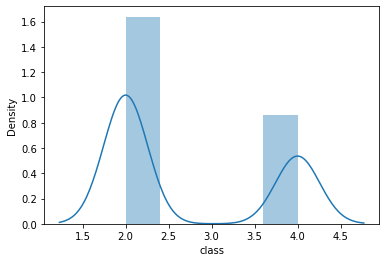

In [26]:
sns.distplot(df['class']);

### Multivariate Data Analysis

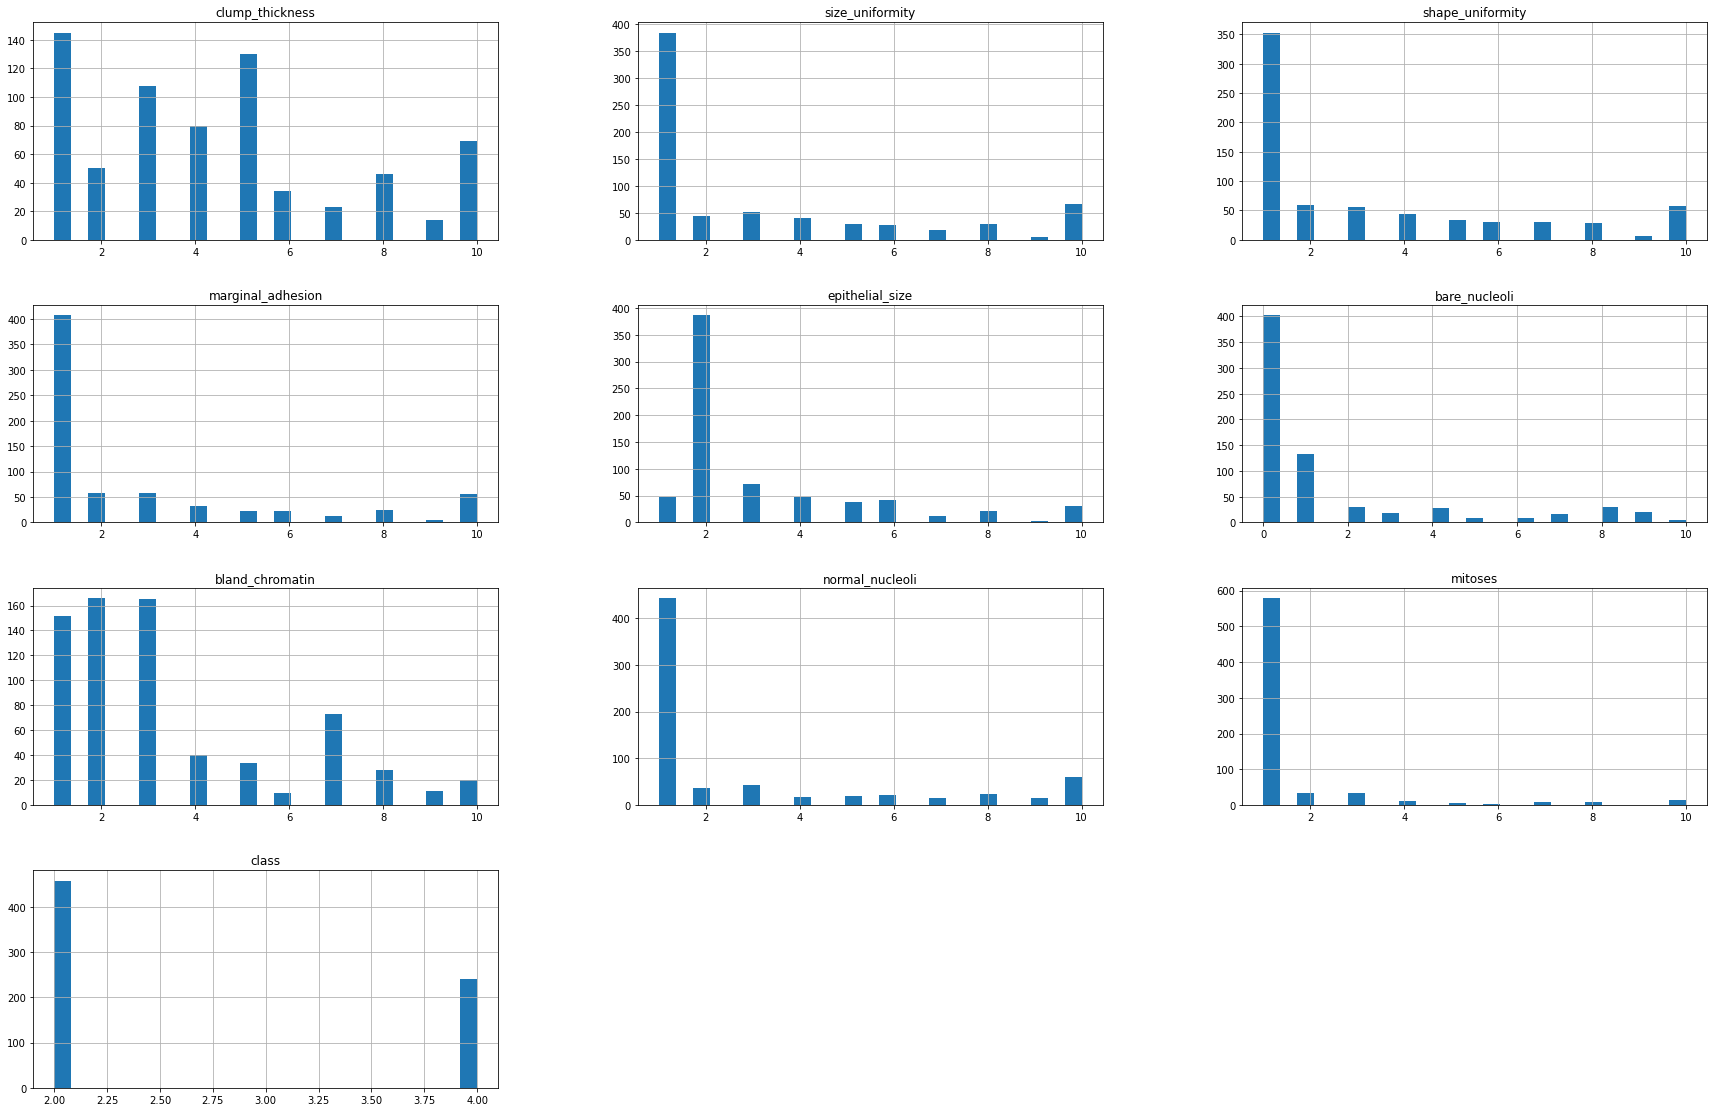

In [28]:
df.hist(bins=25, figsize=(30,30), layout=(6,3));

# Building the Model - KNN

In [30]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,0,3,1,1,2
1,5,4,4,5,7,1,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,3,3,7,1,2
4,4,1,1,3,2,0,3,1,1,2


In [31]:
X=df.drop('class', axis=1)
y=df['class']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [34]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.966
k: 3, Train/Test Score: 0.966/0.949
k: 5, Train/Test Score: 0.966/0.954
k: 7, Train/Test Score: 0.969/0.954
k: 9, Train/Test Score: 0.969/0.954
k: 11, Train/Test Score: 0.969/0.954
k: 13, Train/Test Score: 0.968/0.954
k: 15, Train/Test Score: 0.964/0.949
k: 17, Train/Test Score: 0.964/0.949
k: 19, Train/Test Score: 0.966/0.954


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

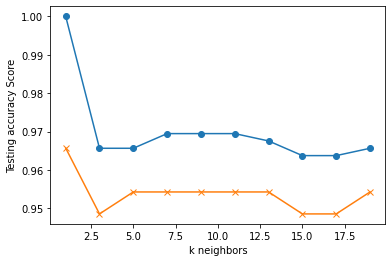

In [35]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [36]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.954


# SVM

In [37]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,0,3,1,1,2
1,5,4,4,5,7,1,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,3,3,7,1,2
4,4,1,1,3,2,0,3,1,1,2


In [38]:
X=df.drop('class', axis=1)
y=df['class']

# Create a Train Test Split



In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
X_train.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
163,1,1,1,2,1,4,1,1,7
286,10,10,10,10,10,1,4,10,10
612,8,10,10,10,6,1,10,10,10
517,1,1,1,1,1,0,2,1,1
464,4,1,1,1,2,0,1,1,1


In [41]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9142857142857143

In [42]:
import graphviz
dot_data =tree.export_graphviz(
    clf, out_file = None,
    feature_names = ['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses'],
    class_names = ["Benign", "Malignant"],
    filled = True, rounded = True,
    special_characters = True)

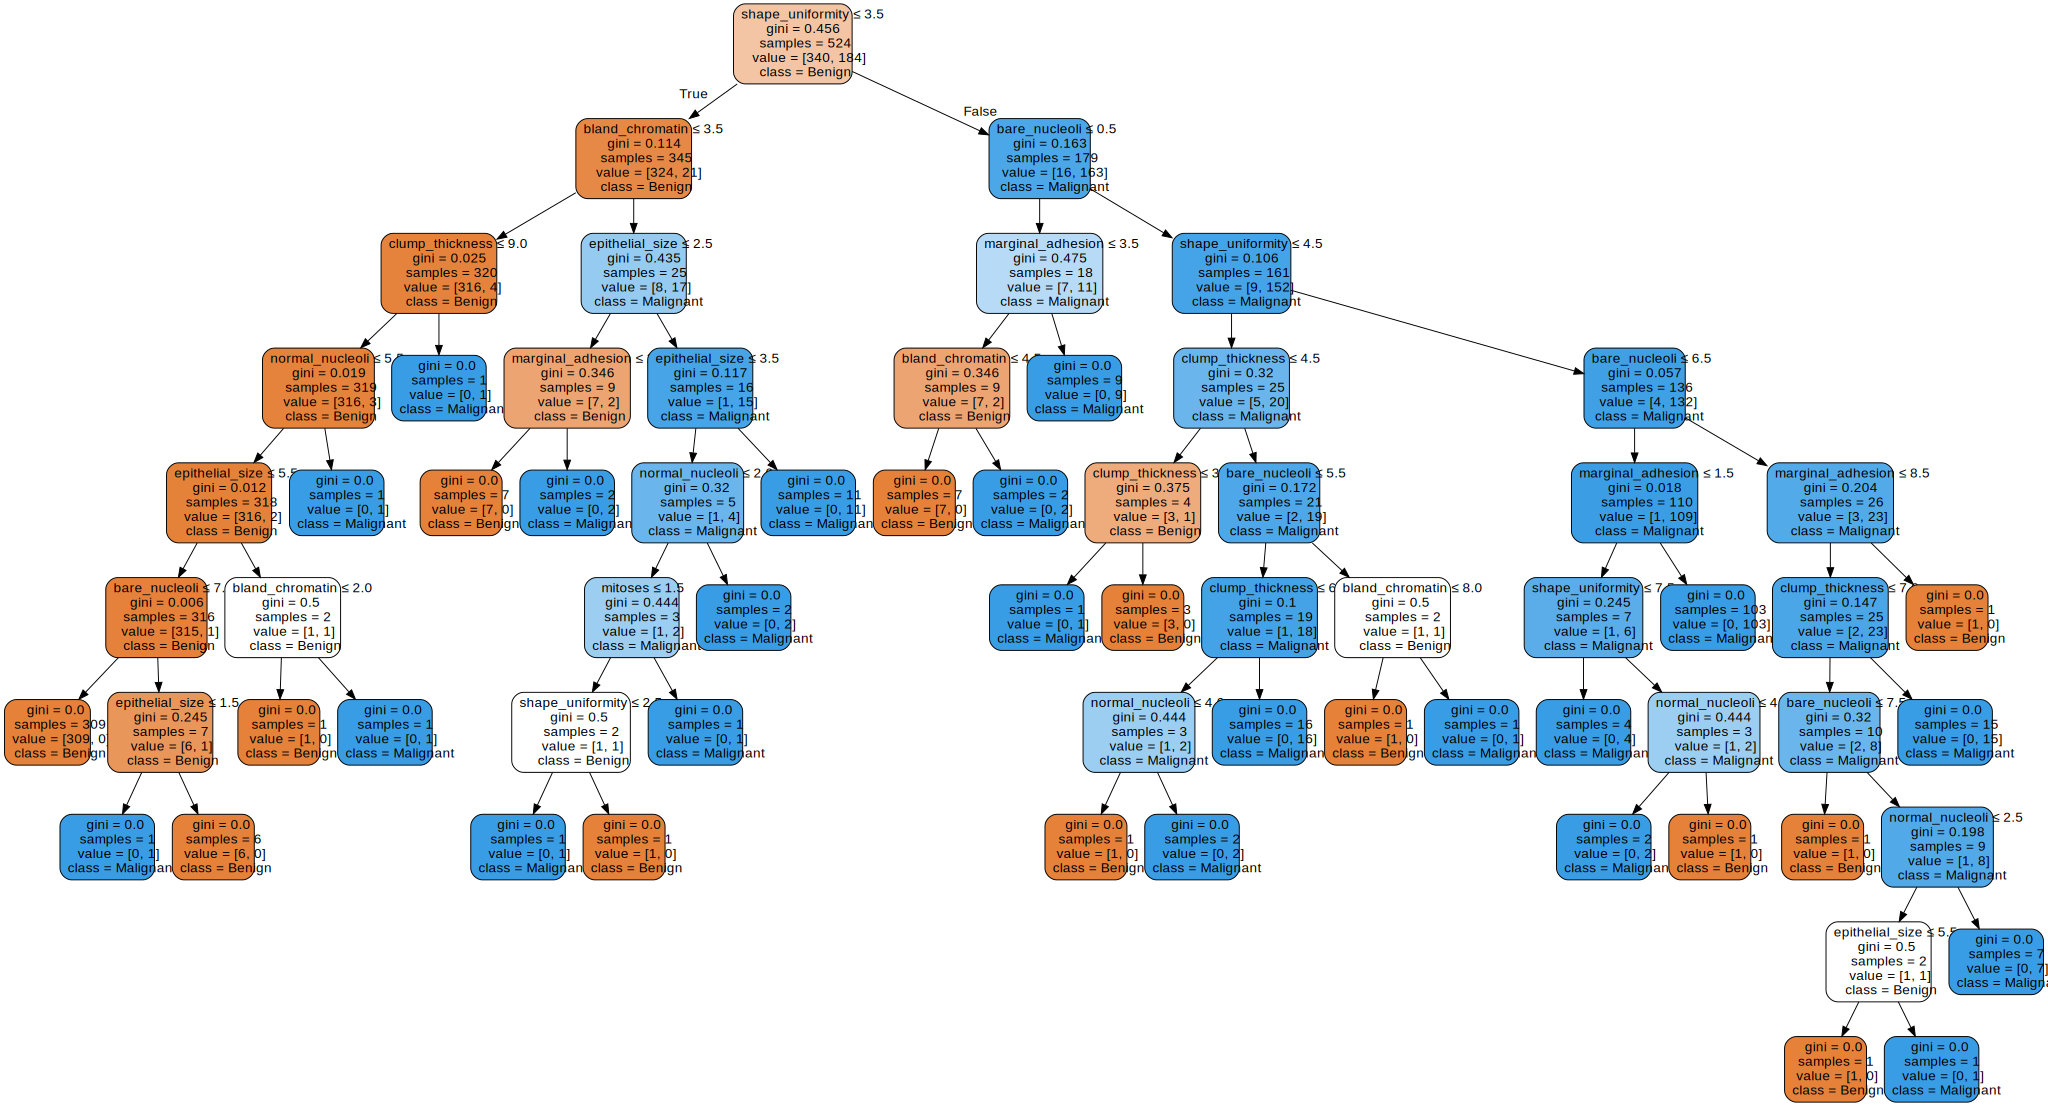

In [43]:
import pydotplus
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
img = graphviz.Source(dot_data)
img

In [77]:
# Export to pdf files
graph.write_pdf("tree.pdf")


True

In [45]:
# Image
graph.write_png('tree.png')

True

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [46]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler model and fit it to the training data
X_minmax = MinMaxScaler().fit(X_train)



In [47]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

# Train the Model



In [48]:
from sklearn.svm import SVC 
model2 = SVC(kernel='linear')
model2.fit(X_train_minmax, y_train)

SVC(kernel='linear')

In [49]:
print(f"Training Data Score: {model2.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_minmax, y_test)}")

Training Data Score: 0.9637404580152672
Testing Data Score: 0.96


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [50]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid2 = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid2 = GridSearchCV(model2, param_grid2, verbose=3)

In [51]:
# Train the model with GridSearch
grid2.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 1/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............................C=1,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [52]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 1, 'gamma': 0.0001}
0.9617948717948719


In [53]:
# Training score:
grid2.score(X_train_minmax, y_train)


0.9637404580152672

In [54]:
# Testing score:
grid2.score(X_test_minmax, y_test)



0.96

In [55]:
# Make prediction and save to variable for report.
predictions = grid2.predict(X_test_minmax)

In [56]:
# Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       118
           4       0.93      0.95      0.94        57

    accuracy                           0.96       175
   macro avg       0.95      0.96      0.95       175
weighted avg       0.96      0.96      0.96       175



# Save the Model

In [74]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'svm.sav'
joblib.dump(model2, filename)





['svm.sav']

In [58]:
#### RandomForestsClassifier

In [59]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler model and fit it to the training data
X_minmax = MinMaxScaler().fit(X_train)


In [60]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_minmax, y_train)


In [62]:
print(f"Training Data Score: {rf.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_minmax, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.96


In [63]:
#sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [64]:
#### HyperParameter Tuning

In [65]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [66]:
# Train the model with GridSearch
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=2

[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_

[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, m

[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True,

[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=Tru

[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=T

[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=

[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap

[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=

[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 4/5] END bootstrap=T

[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 3/5] END bootstrap=Tr

[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 2/5] END bootstrap=Tru

[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 2/5] END bootstrap=Tru

[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 2/5] END bootstrap=Tru

GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=3)

In [67]:
print(grid.best_params_)
print(grid.best_score_)

{'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
0.9694322344322345


In [68]:
# Training score:
grid.score(X_train_minmax, y_train)


0.9694656488549618

In [69]:
# Testing score:
grid.score(X_test_minmax, y_test)


0.9714285714285714

In [70]:
# Make prediction and save to variable for report.
predictions = grid.predict(X_test_minmax)

In [71]:
# Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       118
           4       0.95      0.96      0.96        57

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



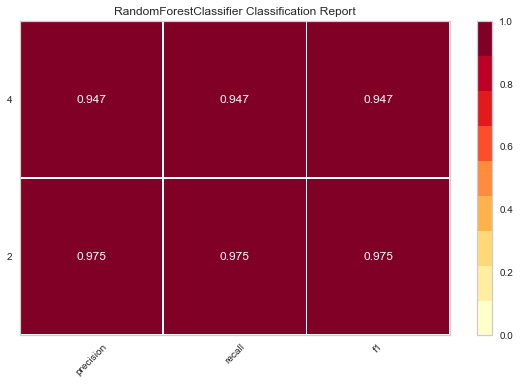

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [72]:
!pip install yellowbrick
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(RandomForestClassifier())
visualizer.fit(X_train_minmax, y_train)
visualizer.score(X_test_minmax, y_test)
visualizer.finalize()
visualizer.show()

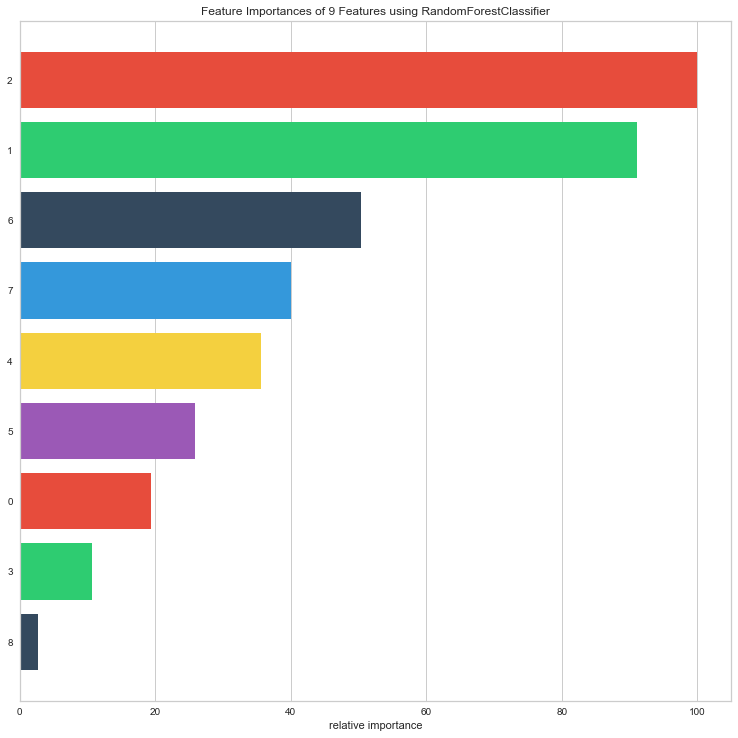

<AxesSubplot:title={'center':'Feature Importances of 9 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [73]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.style import set_palette
from yellowbrick.features import RadViz
set_palette('flatui')
viz = FeatureImportances(rf, size=(750, 750))
viz.fit(X_train_minmax, y_train)
viz.show()